# Natural Language Processing 2023-1A Homework 3

# Vector Semantics and Word2Vec 

Deadline: 27 September (23:59)

Questions: Post them in the HW3 discussion on Canvas, sent them to nlp-course@utwente.nl or ask us during the practical sessions. 

How to submit: Please answer the questions directly in this notebook and submit it before the deadline.

## Please Write your group number, your names with student IDs Here: 
Group 10 

Student Name and student Id: Hafsa Azhar s3099849
Ali Ammar s2372347



Make sure that the following libraries are up-to-date in your computation envrionment. It is highly recommended to work on this assignment in UT's [JupyterLab](https://www.utwente.nl/en/service-portal/research-support/it-facilities-for-research/jupyterlab). 

In [32]:
!pip3 install gensim nltk sklearn numpy pandas scipy 
!pip install  --upgrade gensim nltk sklearn numpy pandas scipy ### Upgrade your libraries if neccesary

ERROR: Invalid requirement: '###'


We'll need these libraries later.

In [33]:
import pandas, numpy, scipy, math
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity 
from gensim.test.utils import datapath
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import codecs
import time

In this assignment, you will explore two types of word vectors: those derived from **co-occurrence count-based methods**, and those derived via the **local context predictive model word2vec**. 

Note on Terminology: 
- The word "word" and "term" are used interchangeably here. They both mean the unique tokens that you would like to represent in terms of vectors. Often they are individual words, n-grams,  phrases, or even identifiers. In the assignment, we focus on individual words. 
- The terms "word vectors" and "word embeddings" are often used interchangeably, but they are actually different. According to [Wikipedia](https://en.wikipedia.org/wiki/Word_embedding), conceptually, word embedding "*involves the mathematical embedding from space with many dimensions per word to a continuous vector space with a much lower dimension*".

# Part I. Co-occurrence count-based vectors

Let's start with this corpus consisting of 5 sentences.

In [34]:
sents=['Simultaneous heatwaves at North and South Poles.',
        'Both North and South poles see unusual high heat.',
        'North pole is heating up. What about South pole?',
        'Bizarre heatwaves strike Arctic and Antarctic poles.',
        'Climate change at the poles.'
       ]

### Exercise 1.1.1 Construct the vocabulary (0.5 point)
Before we construct co-occurrence matrices, we need to identify unique terms in the corpus, i.e. construct the vocabulary. You can remove stop words and apply other text normalisation operations before constructing the vocabulary. 

Tip: Sort your vocabulary alphabetically!

In [35]:
# Creating a CountVectorizer with stop words and sorting it
vectorizer = CountVectorizer(stop_words=stopwords.words('english')).fit(sents)
vocab = [*vectorizer.vocabulary_]
vocab = sorted(vocab, reverse=False)

# your code ends here

print('The size of the vocabulary is', len(vocab))
print('The words in the vocabulary are', vocab)


The size of the vocabulary is 17
The words in the vocabulary are ['antarctic', 'arctic', 'bizarre', 'change', 'climate', 'heat', 'heating', 'heatwaves', 'high', 'north', 'pole', 'poles', 'see', 'simultaneous', 'south', 'strike', 'unusual']


### Co-Occurrence

A co-occurrence matrix counts how often terms co-occur in certain context. The context can be a complete document, a sentence, or a sliding window. 

Tip: Check out the [sklearn.feature_extraction.text](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction.text) submodule that gathers utilities to build feature vectors from text documents. 

### Exercise 1.1.2 Term-document occurrence matrix and term-term co-occurrence matrix (0.5 point)
Let's first consider **each sentence** in the above corpus to be the context where the (co-)occurrences are counted. For example, the words *heatwaves*, *north*, *south* and *poles* occur in the first sentence, therefore, they occur in this document and co-occur with each other. Going through all the sentences, you can construct the term-document occurrence matrix and term-term co-occurrence matrix. 

In [36]:
# Construct the term-document occurrence matrix: tdMatrix_pd

count_vectorizer= CountVectorizer(vocabulary=vocab, binary=True)
tdMatrix = count_vectorizer.transform(sents)
# to match the expected shape 
tdMatrix = tdMatrix.transpose()
# your code ends here

print('The shape of the term-document matrix is', tdMatrix.shape)
tdMatrix_pd = pandas.DataFrame(tdMatrix.toarray(), index=vocab, columns=range(1, len(sents) + 1))
tdMatrix_pd

The shape of the term-document matrix is (17, 5)


,1,2,3,4,5
antarctic,0,0,0,1,0
arctic,0,0,0,1,0
bizarre,0,0,0,1,0
change,0,0,0,0,1
climate,0,0,0,0,1
heat,0,1,0,0,0
heating,0,0,1,0,0
heatwaves,1,0,0,1,0
high,0,1,0,0,0
north,1,1,1,0,0


Tip: You can derive the term-term co-occurrence matrix directly from the term-document occurrence matrix. 

In [37]:
# your code starts here
# Convert tdMatrix to a NumPy array
tdMatrix = tdMatrix.toarray()

# Construct the term-term co-occurrence matrix
ttMatrix = tdMatrix.dot(tdMatrix.T)
numpy.fill_diagonal(ttMatrix, 0)
# your code ends here
print('The shape of the term-term matrix is', ttMatrix.shape)
ttMatrix_pd = pandas.DataFrame(ttMatrix, index=vocab, columns=vocab)
ttMatrix_pd


The shape of the term-term matrix is (17, 17)


,antarctic,arctic,bizarre,change,climate,heat,heating,heatwaves,high,north,pole,poles,see,simultaneous,south,strike,unusual
antarctic,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
arctic,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
bizarre,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
change,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
climate,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
heat,0,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,1
heating,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
heatwaves,1,1,1,0,0,0,0,0,0,1,0,2,0,1,1,1,0
high,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,1
north,0,0,0,0,0,1,1,1,1,0,1,2,1,1,3,0,1


Based on term-term co-occurrence matrix, which pair(s) of words co-occur the most? 

**YOUR ANSWER**: 
"north" "south" are the the words that occurs the most

### Exercise 1.1.3 (1 point)
Given some word $w_i$ occurring in the corpus, we can also consider the **context window** surrounding $w_i$. Supposing our fixed window size is $n$, then this is the $n$ preceding and $n$ subsequent words in that document, i.e. words $w_{i-n} \dots w_{i-1}$ and $w_{i+1} \dots w_{i+n}$. We build a *co-occurrence matrix* $M$, which is a symmetric word-by-word matrix in which $M_{ij}$ is the number of times $w_j$ appears inside $w_i$'s window. 


In [38]:
from nltk.tokenize import RegexpTokenizer


def getTermTermWindowMatrix(corpus, window_size=2):
    """ Note: Apply text normalisation before counting. 
              Each word in a document should be at the center of a window. 
              Words near edges will have a smaller number of co-occurring words. 
              For example, for the document "Both North and South poles see unusually high heat" with window size of 4,
              "north" will co-occur with one word before (i.e. "both") and four words after (i.e. "south", "poles", "see", and "unusally")
    
        Params:
            corpus (list of list of strings): corpus of documents
            window_size (int): size of context window
        Return:
            M (numpy matrix of shape (size of vocabulary, size of vocabulary)): 
                Co-occurence matrix of word counts. 
                The vocabulary contains all the unique words in the corpus
                The ordering of the words in the rows/columns should be the same

    """
    # your code starts here
    vectorizer = CountVectorizer(stop_words=stopwords.words('english')).fit(corpus)
    vocab = [*vectorizer.vocabulary_]
    vocab = sorted(vocab, reverse=False)
    #Initialize it with zeros
    tmMatrix = numpy.zeros((len(vocab), len(vocab)))
    #check each document 
    for doc in corpus:
        tokens = RegexpTokenizer(r'\w+').tokenize(doc.lower())
        tokens = [word for word in tokens if not word in stopwords.words('english')]  #if not then put in the tokens
        #Now check each document and each words according to critea within the window size 
        for i in range(len(tokens)): #check each words
            for j in range(window_size): #check according to the window size
                if i - j - 1 >= 0 and tokens[i] not in stopwords.words('english') and tokens[i - j - 1] not in stopwords.words('english'):
                    tmMatrix[vocab.index(tokens[i])][vocab.index(tokens[i - j - 1])] += 1 #check the center word and before if it is in limit then increment
                if i + j + 1 < len(tokens) and tokens[i] not in stopwords.words('english') and tokens[i + j + 1] not in stopwords.words('english'):
                    tmMatrix[vocab.index(tokens[i])][vocab.index(tokens[i + j + 1])] += 1 #Now check the center word and after if it is in limit then increment

    return tmMatrix, vocab
    # your code ends here
ttwMatrix,vocab=getTermTermWindowMatrix(sents, 2)
seettwMatrix = pandas.DataFrame(ttwMatrix, index=vocab, columns=vocab)
seettwMatrix

,antarctic,arctic,bizarre,change,climate,heat,heating,heatwaves,high,north,pole,poles,see,simultaneous,south,strike,unusual
antarctic,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
arctic,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
bizarre,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
change,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
climate,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
heat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
heating,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
heatwaves,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
high,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
north,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,2.0,0.0,0.0


## Exercise 1.2 Cosine similarity
The benefit of vector semantics is that the similarity of two words can be computed as the cosine similarity between their vectors. Let's now compare how similar two words are. 

### Exercise 1.2.1 Write your own cosine similarity function (0.5 point)

The cosine similarity metric between two vectors $v$ and $w$  can be computed as:
$cosine(v,w )={\mathbf {v} \cdot \mathbf {w}  \over \|\mathbf {v} \|\|\mathbf {w} \|}={\frac {\sum \limits _{i=1}^{n}{v_{i}w_{i}}}{{\sqrt {\sum \limits _{i=1}^{n}{v_{i}^{2}}}}{\sqrt {\sum \limits _{i=1}^{n}{w_{i}^{2}}}}}}$.

Implement your cosine similarity function. 

In [39]:
import numpy as np

# Define the cosine similarity function
def cosine_similarity(vec1, vec2):
    #Now lets check according to the forula given above
    return ((numpy.array(vec1)*numpy.array(vec2)).sum())/(math.sqrt((numpy.array(vec1)*numpy.array(vec1)).sum())*math.sqrt((numpy.array(vec2)*numpy.array(vec2)).sum()))


    

# Your code continues here
vec1 = tdMatrix[vocab.index('antarctic')]
vec2 = tdMatrix[vocab.index('arctic')]
print(cosine_similarity(vec1, vec2))

vec1 = ttMatrix[vocab.index('antarctic')]
vec2 = ttMatrix[vocab.index('arctic')]
print(cosine_similarity(vec1, vec2))

vec1 = ttwMatrix[vocab.index('antarctic')]
vec2=ttwMatrix[vocab.index('arctic')]
print(cosine_similarity(vec1, vec2))


1.0
0.7999999999999998
0.5773502691896258


What is the cosine similarity between "antarctic" and "arctic" if 1) using term-document occurrence matrix 2) using term-term co-occurrence matrix?

**Your Answer**
we got 1.0 for the term document, 0.799 for term-term co-occurrence matrix and 0.577 acording to the window size.



### Exercise 1.2.2 (0.5 point)

Now we can calculate cosine similarity between words using a co-occurrence matrix. You can choose any previously constructed matrix for the similarity calculation. Rank all the words based on their similarity to the word *north*.

In [40]:
# Rank all the words by their similarity to word "north"

# your code starts here
#First let's make a an empty set
similarity_cal = []
for word in vocab:
    if vocab.index("north") == vocab.index(word):
        similarity_cal.append(0.0) #cosine similarity between north and itself is always 1, and this code represents it as 0.0
    else:
            similarity_cal.append(cosine_similarity(tdMatrix[vocab.index('north')],tdMatrix[vocab.index(word)])) #calculates the similarity
ranking = pandas.DataFrame(similarity_cal, index=vocab, columns=["similarity_cal"])
ranking.sort_values('similarity_cal', ascending=False)
        
            
        



# your code ends here

,similarity_cal
south,1.000000
high,0.577350
pole,0.577350
simultaneous,0.577350
see,0.577350
poles,0.577350
unusual,0.577350
heating,0.577350
heat,0.577350
heatwaves,0.408248



Does  the  calculated  cosine  similarity  reflect  semantic  similarity  or  relatedness?
- If yes, to what extent?
- If not, think of ways to get more reliable similarities



**YOUR ANSWER**: 



Cosine similarity measures the cosine of the angle based on their co-occurrence patterns in a corpus. While it can provide some indication of relatedness, it doesn't capture the full depth of semantic similarity, especially in a small corpus. It also depends on the context window size, the smaller context window size might miss broader semantic relationships.



# Exercise 1.3 TF-IDF

## Excercise 1.3.1 (1 point)
For the above corpus, construct a TF-IDF weighted term-document matrix, using the formula 6.12 and 6.13 in the J&M book. 
- $tf(t,d) = \log _{10}(count(t,d) +1)$ (6.12)
- $idf(t) = \log_{10} \frac{N}{df(t)}$ (6.13)


In [41]:
#in order to calculate TF-IDF we need to calculate the frequency of words and 
#term frequency (tf) for the word in that document 


# Function to calculate TF-IDF matrix
def get_tfidfMatrix(corpus, vocab):
    M = len(vocab)
    N = len(corpus)
    tfidf_matrix = np.zeros((M, N), dtype=float)  # Initialize the matrix with zeros

    for i, word in enumerate(vocab):
        idft = math.log10(N / np.count_nonzero(tdMatrix[i, :]))  # Calculate IDF for the word

        for j in range(N):
            tf = math.log10(tdMatrix[i, j] + 1)  # Calculate TF for the word in the document

            # Calculate TF-IDF and store it in the matrix
            tfidf_matrix[i, j] = tf * idft

    return tfidf_matrix

tfidf_matrix = get_tfidfMatrix(sents, vocab)

tfidf_matrix_pd = pandas.DataFrame(tfidf_matrix, index=vocab, columns=[1,2,3,4,5])
# your code ends here


Check the ranked list for *north* and see whether it changes. 

In [42]:
# Rank all the words by their similarity to word "north"

# your code starts here
#First let's make a an empty set
similarity_cal = []
for word in vocab:
    if vocab.index("north") == vocab.index(word):
        similarity_cal.append(0.0) #cosine similarity between north and itself is always 1, and this code represents it as 0.0
    else:
            similarity_cal.append(cosine_similarity(tfidf_matrix[vocab.index('north')],tfidf_matrix[vocab.index(word)])) #calculates the similarity
ranking = pandas.DataFrame(similarity_cal, index=vocab, columns=["similarity_cal"])
ranking.sort_values('similarity_cal', ascending=False)
        
            
        



# your code ends here

,similarity_cal
south,1.000000
high,0.577350
pole,0.577350
simultaneous,0.577350
see,0.577350
poles,0.577350
unusual,0.577350
heating,0.577350
heat,0.577350
heatwaves,0.408248


**YOUR ANSWER**: 


## Exercise 1.3.2 (1 point)

Let's use a bigger dataset which contains 2225 BBC news articles to construct TF-IDF term-document matrix. You may use your own function or [`sklearn.feature_extraction.text.TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) from the scikit library to generate TF-IDF weighted term-document matrix. When your matrix is ready, you may use [`sklearn.metrics.pairwise.cosine_similarity`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html) to calculate the pair-wise cosine similarity among all the words. 

In [43]:
#first lets load the data using pandas 
sents=pandas.read_csv('bbc-text/bbc-text.csv')
#Then make sents and vectorize it in to get vocabs and then sort it out
sents= sents['text']
vectorizer = CountVectorizer().fit(sents.tolist())
vocab = [*vectorizer.vocabulary_]
vocab = sorted(vocab, reverse=False)

tdoc_matrix = TfidfVectorizer().fit_transform(sents).toarray()
tdoc_matrix = numpy.matrix(tdoc_matrix).transpose()
tdoc_matrix = pandas.DataFrame(tdoc_matrix, index=vocab, columns=list(range(0, len(sents))))
tdoc_matrix = tdoc_matrix.to_numpy()

print('The size of the vocabulary is', len(vocab))
print('The shape of the term-document matrix is', tdoc_matrix.shape)


The size of the vocabulary is 29421
The shape of the term-document matrix is (29421, 2225)


We can compute which words are most similar to *north*. Does this list of words make more sense now and why?

In [44]:
# Find the top 10 words that are most similar to word "north"

# your code starts here
# Rank all the words by their similarity to word "north"

# your code starts here
#First let's make a an empty set
similarity_cal = []
for word in vocab:
    if vocab.index("north") == vocab.index(word):
        similarity_cal.append(0.0) #cosine similarity between north and itself is always 1, and this code represents it as 0.0
    else:
            similarity_cal.append(cosine_similarity(tdoc_matrix[vocab.index('north')],tdoc_matrix[vocab.index(word)])) #calculates the similarity
ranking = pandas.DataFrame(similarity_cal, index=vocab, columns=["similarity_cal"])
ranking = ranking.sort_values('similarity_cal', ascending=False)
ranking.head(10)
            
        



# your code ends here


,similarity_cal
mallon,0.441048
metric,0.441048
wades,0.441048
487,0.441048
ne,0.441048
robb,0.441048
exerts,0.441048
tomaney,0.441048
939,0.441048
herron,0.377049


**YOUR ANSWER**: 


Find another 3 pairs of words whose cosine similarity makes sense to you.

In [45]:
# Look for 3 pairs of words whose cosine similarities reflect their semantic similarity or relatedness.


home_index = vocab.index("tv")
house_index = vocab.index("television")
similarity1 = cosine_similarity(tdoc_matrix[home_index].reshape(1, -1), tdoc_matrix[house_index].reshape(1, -1))
print("The similarity between 'tv' and 'television' is", similarity1)

technology_index = vocab.index("technology")
technologies_index = vocab.index("technologies")
similarity2 = cosine_similarity(tdoc_matrix[technology_index].reshape(1, -1), tdoc_matrix[technologies_index].reshape(1, -1))
print("The similarity between 'technology' and 'technologies' is", similarity2)

nintendo_index = vocab.index("nintendo")
ds_index = vocab.index("ds")
similarity3 = cosine_similarity(tdoc_matrix[nintendo_index].reshape(1, -1), tdoc_matrix[ds_index].reshape(1, -1))
print("The similarity between 'nintendo' and 'ds' is", similarity3)


The similarity between 'tv' and 'television' is 0.33857192151298376
The similarity between 'technology' and 'technologies' is 0.41697637176522495
The similarity between 'nintendo' and 'ds' is 0.9159118680989702


# Part II. Word2Vec word vectors

Here, we explore the embeddings produced by word2vec. Please read J&M 6.8 or the [original paper](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf) if you are interested in the details of the algorithm.

## Exercise 2.1 Pre-train word2vec model

Run the following script to load the word2vec vectors into memory. **Note**: This might take several minutes. If you run out of memory, try closing other applicaions or restart your machine to free more memory. 

Please note, the following experiments run with Gensim 4.2.0. If you are still running an old version of Gensim, please upgrade your Gensim library or check [Migrating from Gensim 3.x to 4](https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4) to adapt your code. 

In [46]:
# Load 3 million Word2Vec Vectors, pre-trained on Google news, each with the dimension of 300
# This model may take a few minutes to load.

import gensim.downloader as api

start_time = time.time()
w2v_google = api.load("word2vec-google-news-300")
print("--- %s seconds ---" % (time.time() - start_time))

--- 34.10540461540222 seconds ---


In [47]:
print("Loaded vocab size {}".format(len(w2v_google.index_to_key)))

Loaded vocab size 3000000


Once the model is loaded, you can extract the vector for individual words directly using `w2v_google['']`

In [48]:
w2v_google['north']

array([-0.04541016, -0.13769531,  0.03027344, -0.09277344,  0.13867188,
        0.12451172, -0.23730469, -0.38085938, -0.15820312,  0.30273438,
        0.13378906,  0.11767578,  0.06640625,  0.09277344,  0.00405884,
       -0.18945312, -0.17382812,  0.05761719,  0.08691406, -0.06933594,
       -0.0135498 , -0.00915527, -0.20996094,  0.01855469,  0.29296875,
       -0.16113281, -0.10400391,  0.04736328,  0.16308594, -0.04541016,
        0.19140625,  0.09570312, -0.06445312, -0.1953125 , -0.18261719,
        0.1328125 ,  0.1484375 ,  0.07568359,  0.09228516,  0.14746094,
       -0.26953125, -0.05175781, -0.00823975, -0.02075195, -0.23828125,
        0.0291748 ,  0.07470703,  0.11572266, -0.10546875, -0.0534668 ,
        0.28125   , -0.01879883,  0.0859375 , -0.16308594, -0.26171875,
       -0.07470703, -0.14746094,  0.06347656, -0.02624512,  0.03564453,
       -0.11816406, -0.09472656,  0.11572266, -0.29492188,  0.04663086,
       -0.13085938, -0.16210938,  0.16308594, -0.10449219,  0.09

One of the property of semantic embedding is that similar words are embedded close to each other. Use  `w2v_google.most_similar()` to identify the most similar words to *north*. Does this list make more sense to you? 

In [49]:
start_time = time.time()
for w,c in w2v_google.most_similar('north'):
    print(w,c)
print("--- %s seconds ---" % (time.time() - start_time))

south 0.9674535393714905
east 0.9434041380882263
west 0.9415394067764282
northeast 0.7905449271202087
southeast 0.7773157954216003
southwest 0.7741883397102356
northwest 0.7655158638954163
northern 0.6483151912689209
eastern 0.6424223184585571
miles_northeast 0.626194953918457
--- 1.4943640232086182 seconds ---


Check a few more words to see whether their most similar words make sense to you and explain why. 

In [50]:
# Check whether the computed most similar words make sense 
w2v_google.most_similar('Car')
w2v_google.most_similar('Fire')
w2v_google.most_similar('fly')

[('flying', 0.6795352697372437),
 ('flew', 0.6271739602088928),
 ('flies', 0.6233823895454407),
 ('flys', 0.6012992858886719),
 ('flown', 0.5679085850715637),
 ('Fly', 0.5646633505821228),
 ('flight', 0.5158863067626953),
 ('Nash_dribbled_upcourt', 0.5138447880744934),
 ('Hylira_dry_skin', 0.4905606806278229),
 ('fl_y', 0.47577083110809326)]

**YOUR ANSWER**: 


## Word analogies

An analogy explains one thing in terms of another to highlight the ways in which they are alike. For example, *paris* is similar to *france* in the same way that *rome* is to *italy*. Word2Vec vectors sometimes shows the ability of solving analogy problem of the form **a is to b as a* is to what?**.

In the cell below, we show you how to use word vectors to find x. The `most_similar` function finds words that are most similar to the words in the `positive` list and most dissimilar from the words in the `negative` list. The answer to the analogy will be the word ranked most similar (largest numerical value). In the case below, the top one word *italy* is the answer, so this analogy is solved successfully.

In [51]:
# Run this cell to answer the analogy -- paris : france :: rome : x
print(w2v_google.most_similar(positive=['rome', 'france'], negative=['paris']))

[('italy', 0.519952118396759), ('european', 0.5075845718383789), ('italian', 0.5057743191719055), ('epl', 0.490744411945343), ('spain', 0.4888668656349182), ('england', 0.4852672219276428), ('italians', 0.4842422604560852), ('kosovo', 0.48134922981262207), ('lampard', 0.4807734787464142), ('malta', 0.4788566529750824)]


### Exercise 2.1.1 (0.5 point)
Look for one analogy that can be solved successfully and one analogy that could not be solved using this pre-trained Word2Vec model. Check out [this paper](https://www.semanticscholar.org/paper/Efficient-Estimation-of-Word-Representations-in-Mikolov-Chen/330da625c15427c6e42ccfa3b747fb29e5835bf0) for inspirations.

In [52]:
# successful case

print(w2v_google.most_similar(positive=['Microsoft', 'Windows'], negative=['Apple']))


# failed case
print(w2v_google.most_similar(positive=['small', 'smaller'], negative=['bigger']))



[('Windows_Server', 0.7220765948295593), ('Windows_XP', 0.7009360194206238), ('Windows_Vista', 0.6962896585464478), ('SQL_Server', 0.6365721225738525), ('XP', 0.6180671453475952), ('Microsoft_Windows_Server', 0.6135652661323547), ('Internet_Explorer', 0.6133346557617188), ('Win9x', 0.6113196611404419), ('Windows_XP_Professional', 0.6073130369186401), ('XP_SP2', 0.6046479344367981)]
[('large', 0.6323751211166382), ('medium_sized', 0.6192846894264221), ('tiny', 0.6122103929519653), ('Small', 0.5687544345855713), ('midsized', 0.516776442527771), ('mid_sized', 0.511078953742981), ('Smaller', 0.5031224489212036), ('Large', 0.47713330388069153), ('mediumsized', 0.46509087085723877), ('micro', 0.4602005183696747)]


## Visualising word analogies

The following cell shows you how to use [tSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) to visualise a set of words based on their embeddings. You can also apply other dimensionality reduction methods (e.g. [sklearn.decomposition.TruncatedSVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html)) to reduce the vectors from 300-dimensional to 2 dimensional. 

Please note, reducing dimensionality from 300 to 2 is a very challenging task. You can try different parameters in the tSNE and see their effects on the final visualisation. In particular, the visualisation is very sensitive to the perplexity value that you give. Please try a few different perplexity valuse and keep the one that gives the most reasonable visusalisation. 

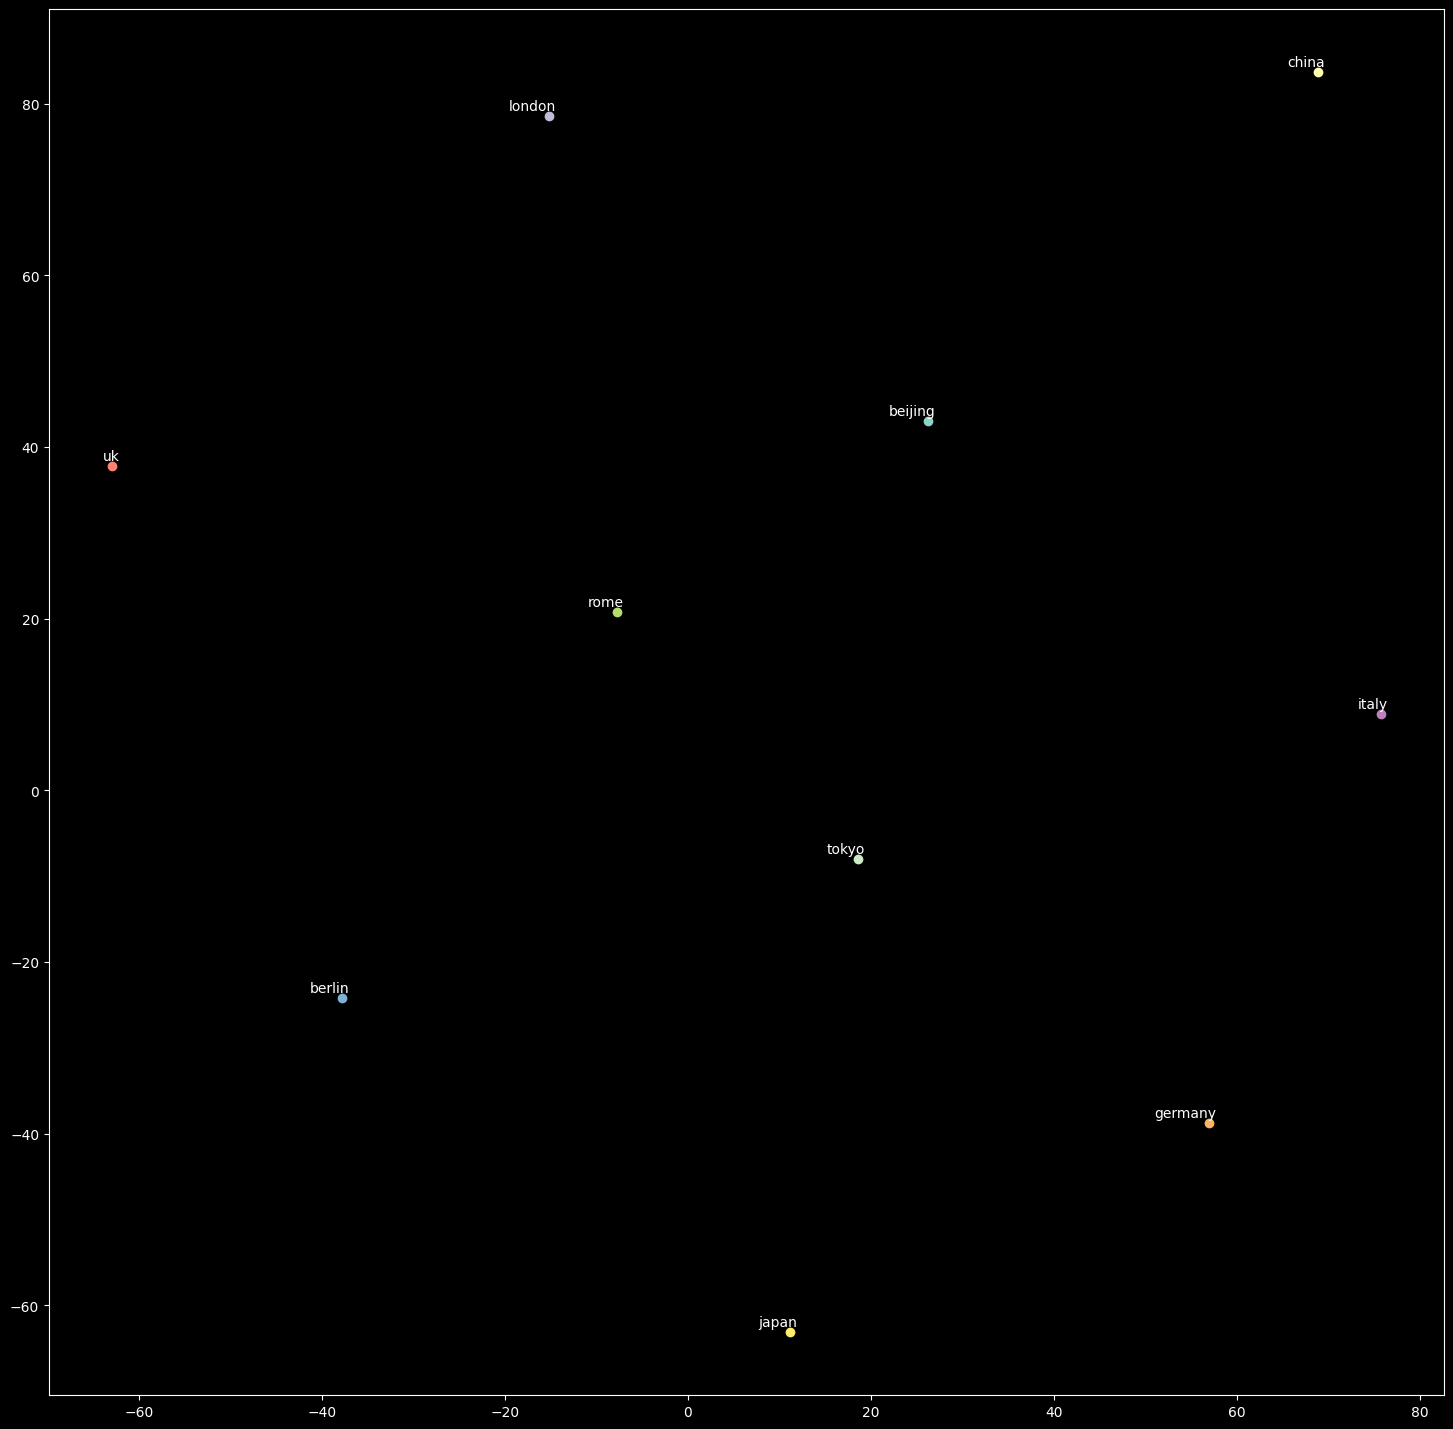

In [53]:
def tsne_plot(model, wordlist,p): # Create TSNE model and plot it
    labels = []
    tokens = []
    
    for word in wordlist:
        tokens.append(model[word])
        labels.append(word)
    
    tokens=numpy.array(tokens)
    
    tsne_model = TSNE(perplexity=p, n_components=2, init='pca', n_iter=2500, random_state=23) 
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(18, 18)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
   
wordlist=['beijing','china', 'london', 'uk', 'berlin', 'germany', 'rome', 'italy','tokyo', 'japan', ]
tsne_plot(w2v_google, wordlist,len(wordlist)-3)

### Exercise 2.1.2 (0.5 point)
Find another group analogies (at least 3 pairs of words) and see how they are visualised.  

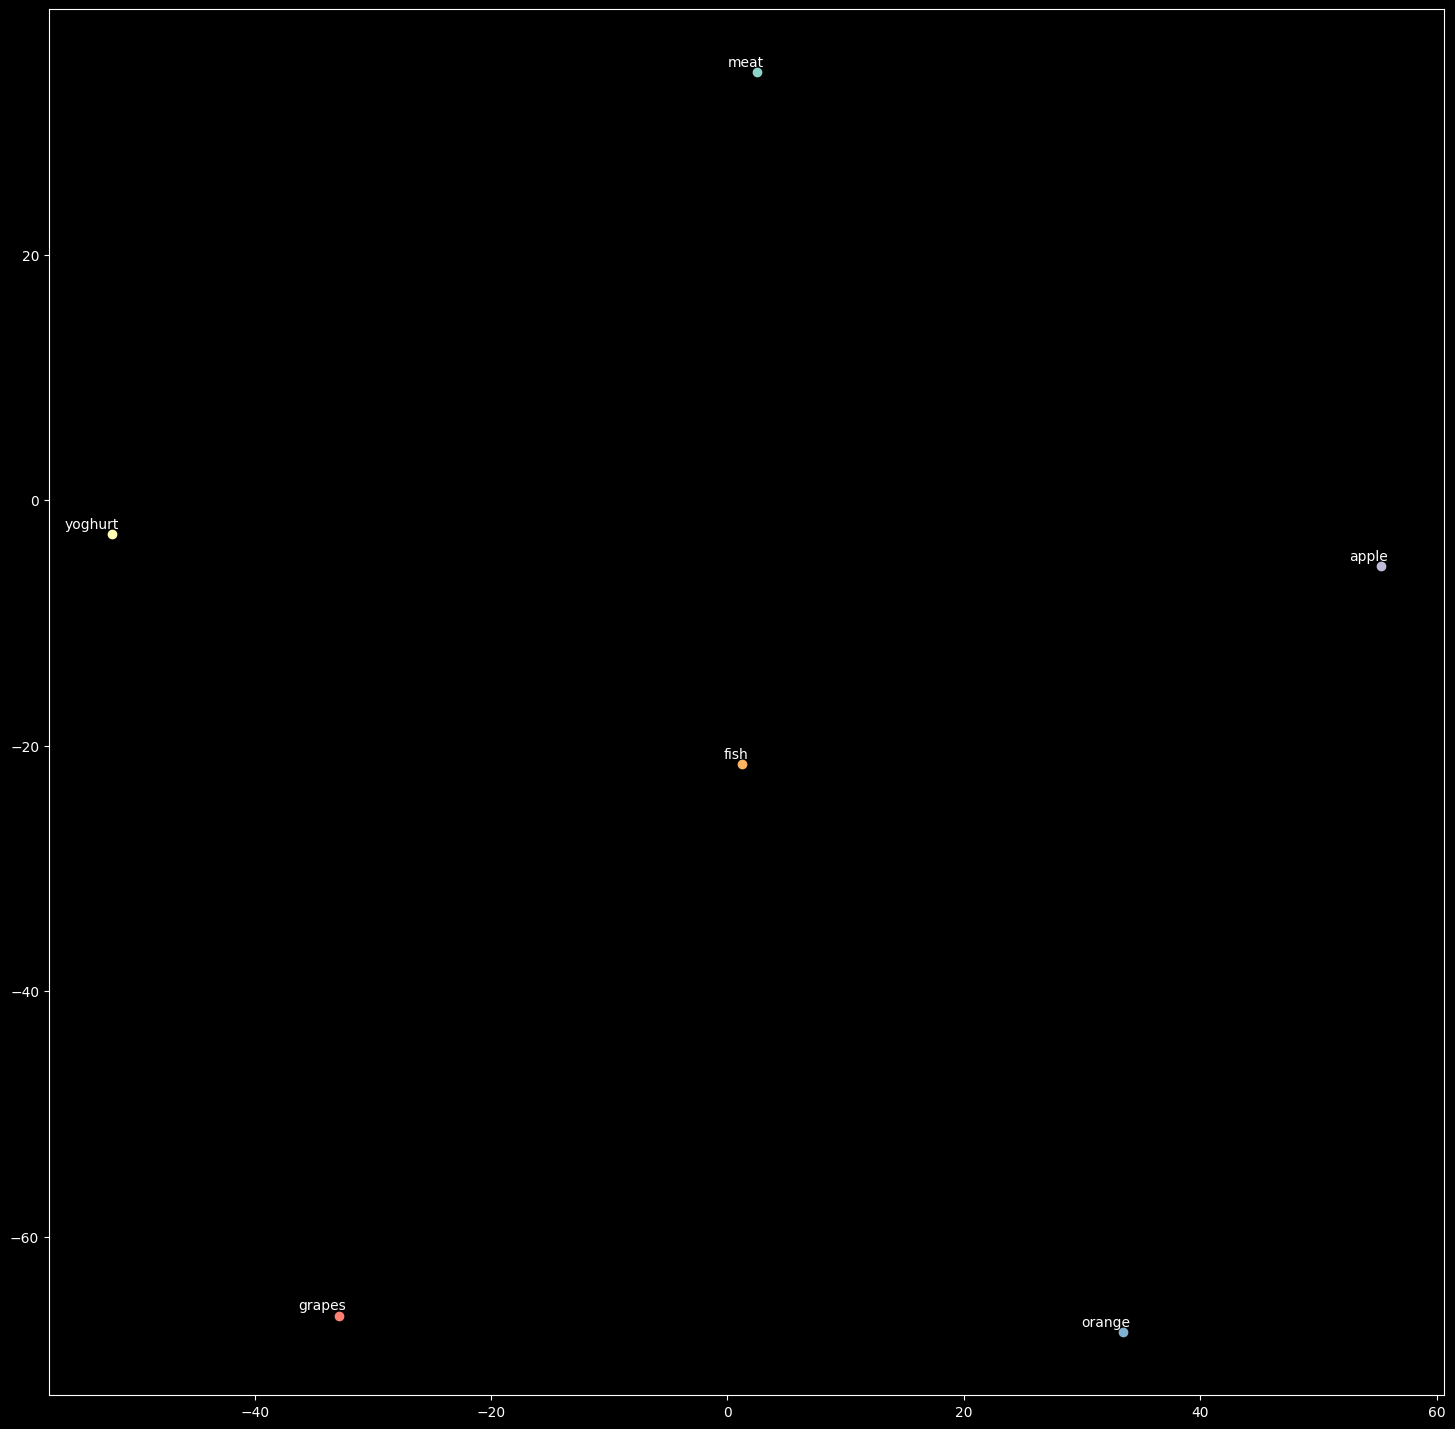

In [54]:
# prepare at least 3 pairs of words   

# your answer goes here

wordlist=["meat", "yoghurt", "apple", "grapes", "orange", "fish"]
p=len(wordlist)-1
tsne_plot(w2v_google,wordlist,p)

### Exercise 2.1.3  Synonyms and antonyms (0.5 point)



Find three words (w1, w2, w3) so that 
- w1 and w2 are synonyms, 
- w1 and w3 are antonyms, 
- cosine_distance(w1, w2) > cosine_distance(w1, w3) or cosine_distance(w1, w2) $\approx$ cosine_distance(w1, w3). 

Please give a possible explanation for why this has happened. 

You can use [`w2v_google.distance()`](https://radimrehurek.com/gensim/models/keyedvectors.html) function to compute the cosine distance between two words. 

In [55]:
w1='smart'
w2='cleaver'
w3='naive'

print("Synonyms {}, {} have cosine distance: {}".format(w1, w2, w2v_google.distance(w1, w2)))
print("Antonyms {}, {} have cosine distance: {}".format(w1, w3, w2v_google.distance(w1, w3)))


Synonyms smart, cleaver have cosine distance: 0.8777071014046669
Antonyms smart, naive have cosine distance: 0.6375645995140076


**Your answer**: 

Word2Vec and other vector space models use co-occurrences as the evidence for computing the semantic similarity and relatedness. Some antonyms are often used together in the same context, therefore their vector representations or embeddings are numerically close to each other (small distance). However, many synonyms  are not used often in the same textual context therefore will not have similar vectors, i.e. the cosine distance is higher.  

### Exercise 2.1.4 Polysemous Words (0.5 point)

Some words are polysemous, i.e. they have multiple meanings. For example the word *bank* can be a financial institute or the rising ground bordering a lake or river. Find a polysemous word whose top most similar words contains related words from multiple meanings. You should use the the [`wv_google.most_similar()`](https://radimrehurek.com/gensim/models/keyedvectors.html) function to compute the closet neighbours of the word. You may increase the number of neighbours in order to identify multiple groups of meanings. Submit the ranked word list and explained how the words are grouped into different meanings.

In [56]:
w2v_google.most_similar('head',topn=20)

[('heads', 0.6393268704414368),
 ('Head', 0.5965096354484558),
 ('director', 0.5187345147132874),
 ('assistant', 0.5164069533348083),
 ('deputy', 0.4884401857852936),
 ('chief', 0.4807194173336029),
 ('chair', 0.47800153493881226),
 ('Youssef_Kanjo', 0.4621504843235016),
 ('arm', 0.4410949647426605),
 ('vice_president', 0.43873122334480286),
 ('Faye_Dunaway_bopped', 0.43712300062179565),
 ('Rachid_Bouzouba', 0.4263594448566437),
 ('Masahiro_Katayama_research', 0.4258328974246979),
 ('chairman', 0.4221695363521576),
 ('Raqeeb_Abdel_Latif', 0.4188506603240967),
 ('manager', 0.4168878495693207),
 ('honcho', 0.4143715500831604),
 ('coach', 0.4103063941001892),
 ('boss', 0.4053713381290436),
 ('Peter_Flavel', 0.4032195210456848)]

['head', 'heads', 'Head', 'director', 'assistant', 'deputy', 'chief', 'chair', 'Youssef_Kanjo', 'arm', 'vice_president', 'Faye_Dunaway_bopped', 'Rachid_Bouzouba', 'Masahiro_Katayama_research', 'chairman', 'Raqeeb_Abdel_Latif', 'manager', 'honcho', 'coach', 'boss', 'Peter_Flavel', 'adviser', 'SMH_shaking', 'head_honcho', 'Nikhil_Nagle', 'vicepresident', 'Farhan_Faruqui', 'managing_director', 'Kalpana_Desai', 'directorof', 'president', 'Siggi_Thorkelsson', 'ShowMeCables_Specials_page', 'executive', 'coordinator', 'fists_flexed', 'Frank_McCrystal', 'secretary', 'Yixi_Luoren', 'Rohan_Naik', 'assitant', 'associate', 'officer', 'muttered_softly', 'headcoach', 'Kevin_Higo', 'coach_Tracey_DeKeyser', 'di_rector', 'Jeff_Gladstein', 'Hiroaki_Kuramochi', 'coach_Pati_Rolf', 'doctrinal_watchdog_office', 'Thomas_Maheras', 'SMC_Capitals_equity', 'Renee_Luers_Gillispie', 'Neal_Shear', 'dustpan_Fritz', 'coach_Virgil_Hutchcraft', 'Myar_Rasooli', 'Sergei_Kapkov', 'Tom_Maheras', 'coach_Bradley_Stallins', '

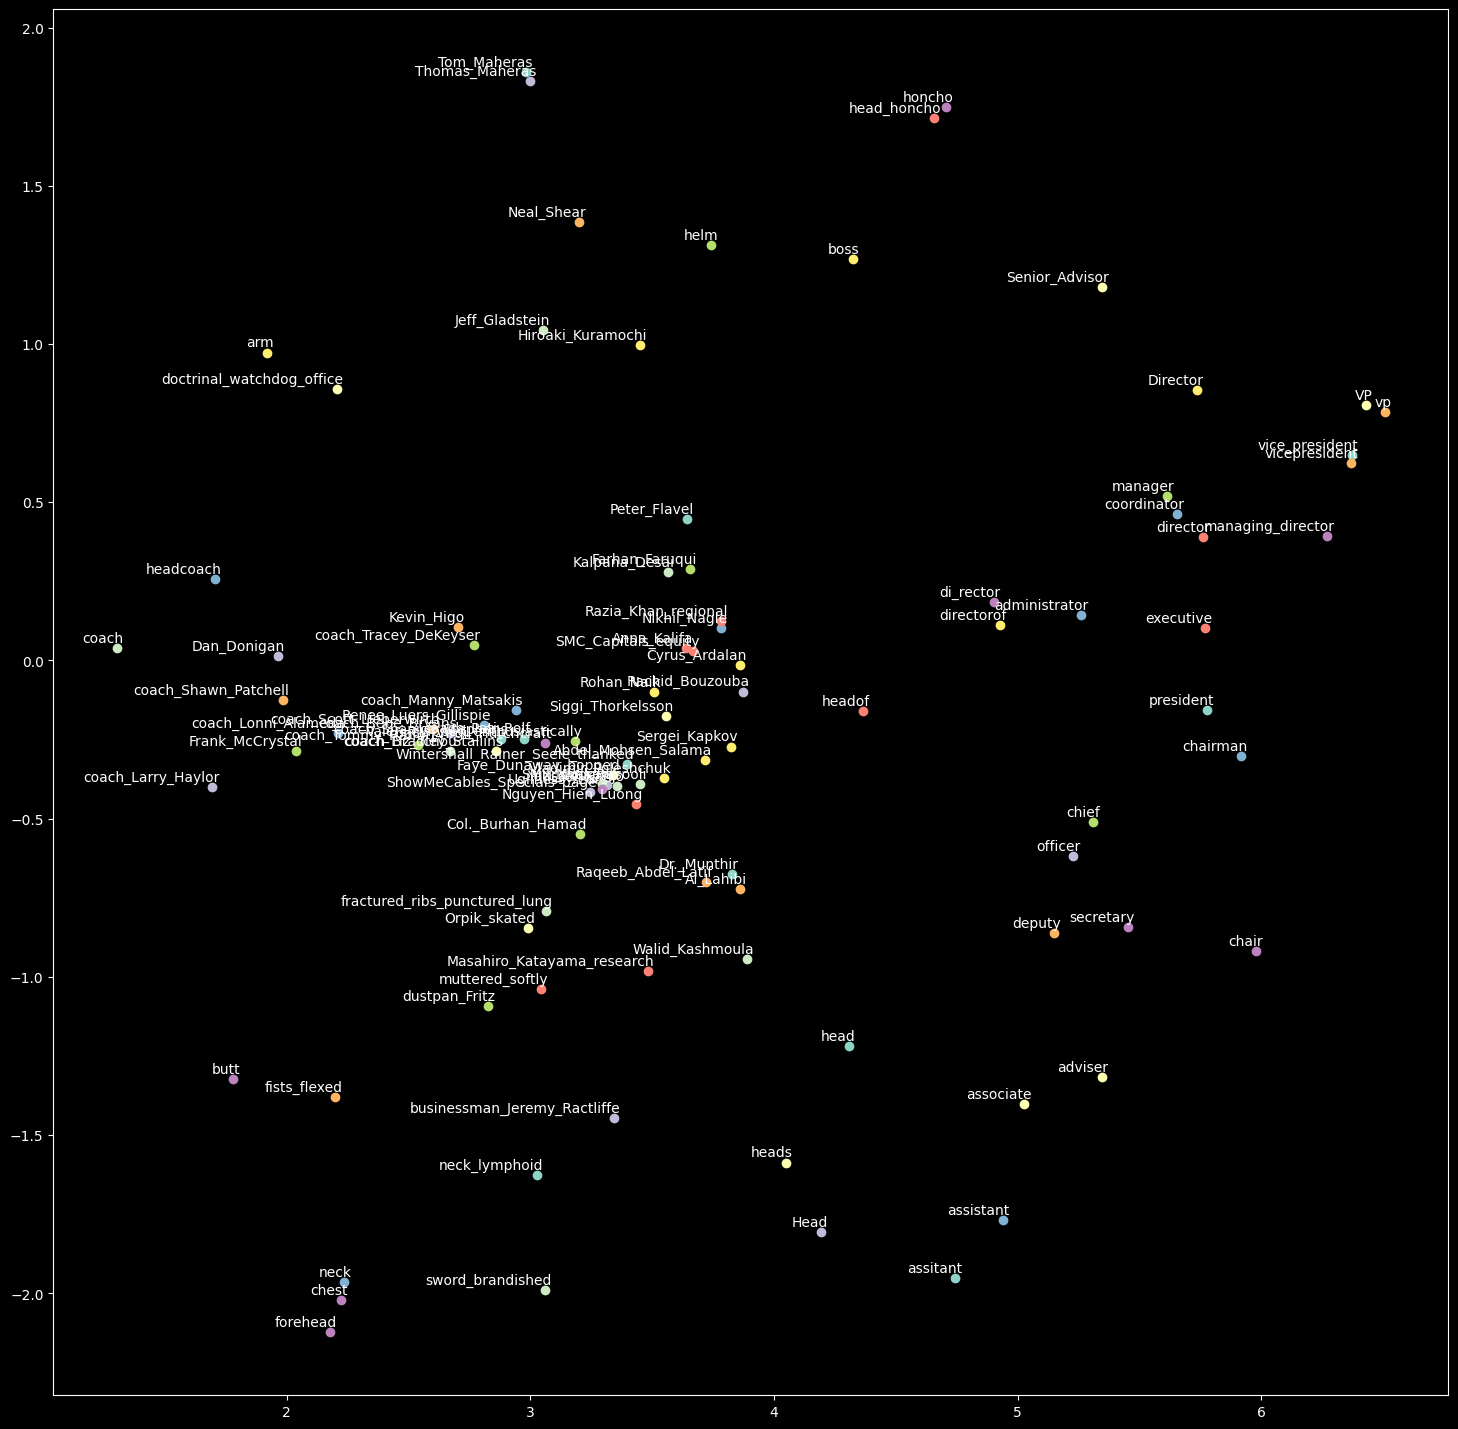

In [57]:
focusword='head'
wordlist=[focusword]
for w in w2v_google.most_similar(focusword,topn=100):
    wordlist.append(w[0])
print(wordlist)
tsne_plot(w2v_google,wordlist,50)

Look into literature and describe potential methods to address this polysymy issue in word embeddings. Please cite the papers that you refer to. 

**YOUR ANSWER**:

Using the focus word "head" we can see it can refer to either head as a body part or head as a leader.

[('heads', 0.6393268704414368),
 ('Head', 0.5965096354484558),
 ('director', 0.5187345147132874),
 ('assistant', 0.5164069533348083),
 ('deputy', 0.4884401857852936),
 ('chief', 0.4807194173336029),
 ('chair', 0.47800153493881226),
 ('Youssef_Kanjo', 0.4621504843235016),
 ('arm', 0.4410949647426605),
 ('vice_president', 0.43873122334480286),
 ('Faye_Dunaway_bopped', 0.43712300062179565),
 ('Rachid_Bouzouba', 0.4263594448566437),
 ('Masahiro_Katayama_research', 0.4258328974246979),
 ('chairman', 0.4221695363521576),
 ('Raqeeb_Abdel_Latif', 0.4188506603240967),
 ('manager', 0.4168878495693207),
 ('honcho', 0.4143715500831604),
 ('coach', 0.4103063941001892),
 ('boss', 0.4053713381290436),
 ('Peter_Flavel', 0.4032195210456848)]


 #### Potential methods
- Using an unsupervised language model. The language model makes use of attention mechanism to calculate the weighted sum of sense specific word embeddings that depends on context. to achieve better performance the disambiguated embedding is fed to the model input.
 
   R. Ma, L. Jin, Q. Liu, L. Chen and K. Yu, "Addressing the Polysemy Problem in Language Modeling with Attentional Multi-Sense Embeddings," ICASSP 2020 - 2020 IEEE International Conference on Acoustics, Speech and Signal Processing (ICASSP), Barcelona, Spain, 2020, pp. 8129-8133, doi: 10.1109/ICASSP40776.2020.9053503.
- SenseEmbed: This methods tries to generate different embedding for various meanings of word. WordNet and other comparable lexical databases are used to determine the different meanings of a word.

   Iacobacci, Ignacio & Pilevar, Mohammad Taher & Navigli, Roberto. (2015). SensEmbed: Learning Sense Embeddings for Word and Relational Similarity. 10.3115/v1/P15-1010. 

## Exercise 2.2  Self-trained Word2Vec model

The word2vec model that we have been using so far is pre-trained on Google news. This is suitable for applications involving general topics. However, for special domains, such as scientific or medical domain, some domain-specific semantics could not be captured in the pre-trained model. Fortunately, word2vec is pretty efficient in training from scratch. We will use two different datasets to observer the effect on the input corpus. 

Importance parameters are highlighted in bold. Please choose a few different values and see their effects.  

class gensim.models.word2vec.Word2Vec(sentences=None, corpus_file=None, **vector_size=100**, alpha=0.025, **window=5**, **min_count=5**, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, **sg=0**, hs=0, **negative=5**, ns_exponent=0.75, cbow_mean=1, hashfxn=<built-in function hash>, epochs=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=10000, compute_loss=False, callbacks=(), comment=None, max_final_vocab=None, shrink_windows=True)
    
Please check the [gensim documentation](https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec) for more assistance. 

In [58]:
# the most similar words to 'young' in Google news
w2v_google.most_similar('young')

[('By_Yoon_Ja', 0.678579568862915),
 ('By_Soh_Ji', 0.66059809923172),
 ('teenage', 0.6431925296783447),
 ('younger', 0.635094165802002),
 ('teenaged', 0.6070023775100708),
 ('impressionable', 0.5947335362434387),
 ('horribly_horribly_deranged', 0.5760281085968018),
 ('youth', 0.5715782642364502),
 ('neglected_clearcut', 0.5711859464645386),
 ('Chung_Ah', 0.5690588355064392)]

### Exercise 2.2.1 (1 point)

We first train a word2vec model on the corpus consisting the abstracts from 111K astrophysics/astronomy articles.

In [59]:

# This might take up a few minutes to train.
from gensim.models.word2vec import LineSentence, Word2Vec
sentences=LineSentence('astro_norm/astro_norm.txt')

start_time = time.time()
# Train a word2vec model using the astro dataset
w2v_astro = Word2Vec(sentences, vector_size=100, window=5, min_count=5, sg=0, negative=5, workers=4)
w2v_astro.save("word2vec_astro_model.model")
# your code starts here


# your code ends here
print("--- %s seconds ---" % (time.time() - start_time))

--- 38.77989625930786 seconds ---


In [60]:
w2v_astro.wv.most_similar('young')

[('youngest', 0.742437481880188),
 ('old', 0.672882080078125),
 ('ob', 0.6675153374671936),
 ('compact', 0.6222204566001892),
 ('massive', 0.6213375329971313),
 ('nearby', 0.6134409308433533),
 ('ysos', 0.6106857061386108),
 ('pms', 0.6037514805793762),
 ('onc', 0.5943813323974609),
 ('yso', 0.5845444202423096)]

If all goes well, you may see *pms*, *proto* or *yso* among the top 10 most similar words to *young*. If you are curious, protostars and pre-main-sequence (PMS) stars are all [Young Stella Objects](https://en.wikipedia.org/wiki/Young_stellar_object)  (YSOs). Here, “young” means pre-main-sequence. For low-mass stars, this means ages of $10^5$ to $10^8$ years. [Ref](https://nexsci.caltech.edu/workshop/2003/2003_MSS/10_Thursday/mss2003_jensen.pdf)

We then train a word2vec model on the corpus consisting of nearly 479K [Medline](https://www.nlm.nih.gov/medline/medline_overview.html) articles. Note, this corpus is rather big. If this is too much for your local machine, use UT's [JupyterLab](https://www.utwente.nl/en/service-portal/research-support/it-facilities-for-research/jupyterlab) or [Google Colab](https://colab.research.google.com/notebooks/). 

In [61]:
# This might take up half an hour to train!

from gensim.models.word2vec import LineSentence, Word2Vec
sentences=LineSentence('medline_norm/medline_norm.txt')

start_time = time.time()
# Train a word2vec model using the astro dataset
# your code starts here

w2v_medline = Word2Vec(sentences, vector_size=100, window=5, min_count=5, sg=0, negative=1, workers=4)
w2v_medline.save("word2vec_medline_model.model")
# your code ends here
print("--- %s seconds ---" % (time.time() - start_time))

--- 201.50599718093872 seconds ---


In [62]:
w2v_medline.wv.most_similar('young')

[('older', 0.7343061566352844),
 ('teenagers', 0.7201871871948242),
 ('adolescent', 0.711237907409668),
 ('adult', 0.7001104354858398),
 ('elderly', 0.6800065040588379),
 ('preadolescent', 0.6697823405265808),
 ('subadults', 0.665940523147583),
 ('healthy', 0.6487777829170227),
 ('preschool', 0.6449048519134521),
 ('prepubertal', 0.6434134244918823)]

Find another word and compute its most similar words based on different models. If you get different lists of words that are most similar to the target word, please explain why this happens.

**YOUR ANSWER**:

In [63]:
w2v_google.most_similar('camera')

[('cameras', 0.8131938576698303),
 ('Wagging_finger', 0.7311819791793823),
 ('camera_lens', 0.7250816226005554),
 ('camcorder', 0.7037475109100342),
 ('Camera', 0.6848660111427307),
 ('Canon_digital_SLR', 0.6474252343177795),
 ('Cameras', 0.6350969672203064),
 ('Nikon_D####_digital_SLR', 0.6259366273880005),
 ('tripod', 0.6189838647842407),
 ('EyeToy_USB', 0.6173486709594727)]

In [64]:
w2v_astro.wv.most_similar('camera')

[('wfc3', 0.7522382140159607),
 ('photometer', 0.7366588711738586),
 ('spectrograph', 0.7342029809951782),
 ('cameras', 0.724847137928009),
 ('mosaic', 0.6905504465103149),
 ('mounted', 0.6900514364242554),
 ('wfi', 0.6866534948348999),
 ('flamingos', 0.6823063492774963),
 ('megacam', 0.6815657019615173),
 ('suprime', 0.6776716113090515)]

In [65]:
w2v_medline.wv.most_similar('camera')

[('cameras', 0.8459745049476624),
 ('scanner', 0.7976422905921936),
 ('handheld', 0.7953632473945618),
 ('radar', 0.7718059420585632),
 ('holographic', 0.7645725607872009),
 ('imager', 0.7639496326446533),
 ('detector', 0.759593665599823),
 ('photography', 0.7318840622901917),
 ('scintillator', 0.71558678150177),
 ('uav', 0.7095403671264648)]

: 

The word used was camera. The 3 models produced different results. The google model result was a list about camera (the device). The astro model result was about devices that can measure electromagnatic radiation abd spectral components.
In case of the medline model the list contained words like radar and scanner which are devices that can be used for medical images.

All three models resulted in a list about some devices that in a way measure light and give a visualization but every model had its own context of words that is related to the dataset which was used to train on.

### Exercise 2.2.2 (1 point)

Experiment with different parameters, for example, the vector size, the window size, the minimal count, skip-gram or CBOW, etc. Observe their effects on the quality of the word embeddings and/or computational cost. 

You can apply intrinsic evaluations to compare the quality of your models. For example, your can check the correlation with human opinion on word similarity or on word analogies. Check [gensim documentations](https://radimrehurek.com/gensim/models/keyedvectors.html) for more options.


**YOUR ANSWER**:

Taking the the standard given properties as the base line: vector_size=100, window=5, min_count=5, sg=0, negative=5

- Increasing the vector_size to 200 has some small effect (increase the time) on the training time but doesnt change the result.
- Decreasing the vector_size to 50 has smaller effect (still increase the time) and also we can see that the result is a bit improved in the sense that the words have closer meaning and higher score.
- Increasing the window to 8 increases the train time a bit but has almost no effect on the result.
- Decreasomg the window to 3 has the same effect as the previous point.
- Increasing min_count to 10 decrease the train time. And decreasing it result in faster train time.
- Increasing sg to 5 results in huge train time and much better results in the sense of word meaning.
- Decreasing negatie to 5 results in faster train time and better results in terms of word meaning.

### Exercise 2.2.3 (0.5 point)
Name at least 2 advantages of dense word vectors such as those calculated with Word2Vec over the vectors based on the term-document or term-term matrix as in Part I.

**YOUR ANSWER**:
1. Dense word vectors are often more computationally efficient than sparse ones. This is because dense vectors have fewer dimensions when compared to term-document vectors.
2. Dense word vectors can capture more semantic relationships (e.g. analogies, synonyms and antonyms).
3. Its easier to scale models like Word2Vec. In the case of term-document or term-term, scaling would mean adding more dimensionality which will make it computationally expensive.

### Exercise 2.2.4 (0.5 point)
Name  at  least  2  limitations  of  the  Word2Vec  embedding  model.   Note,these limitations are not necessarily exclusive for Word2Vec.

**YOUR ANSWER**:

**YOUR ANSWER**:

1. As we have seen eariler in part 2. Word2Vec has some difficulties with words with multiple meanings which means that the model can fail capturing some semantic expressions.
2. Vocabulary that were not present in the training dataset will not have a vectors in the model.
3. Word2Vec only captures individual word semantics but in many cases a word gets its meaning from the context of the sentences which means that Word2Vec can fail to captture the real meaning.